Alec Brunelle, Student # xxx  
Spencer Elliott, Student # 999992539

# Sequential write to file

We experimented writing a 50-mebibyte (MiB) file to three different mediums (solid-state drive, USB flash drive, hard disk drive) using various block sizes ranging from 128 bytes to 2 MiB.

## Solid-state drive
`./experiment_create_random_file.py` was run on a 2014 MacBook Pro (running MacOS 10.12) using a solid-state drive (formatted as Mac OS Extended (Journaled)) with results collected in a file `results_ssd.csv`, summarized below:

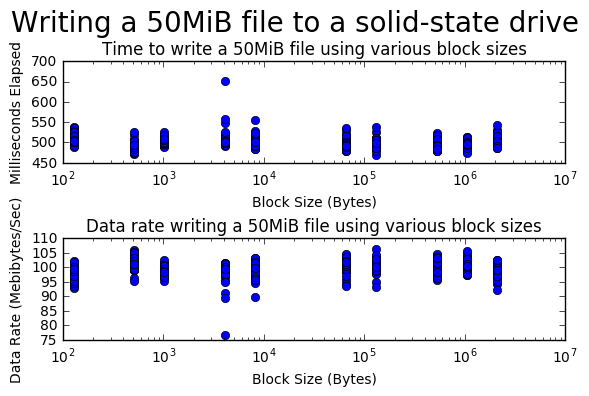

In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt

def get_data(csvfile):
    reader = csv.DictReader(csvfile)
    return zip(*(
        (
            row['block_size'], 
            row['milliseconds_elapsed'],
            # calculate data rate: mebibytes / second
            (
                # convert bytes -> mebibytes
                (int(row['total_size']) / 2 ** 20)
                /
                # convert milliseconds -> seconds
                (int(row['milliseconds_elapsed']) / 1000)
            )
        )
        for row in reader
    ))

with open('./results_ssd.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.suptitle(
        'Writing a 50MiB file to a solid-state drive',
        fontsize=20,
    )
    
    plt.subplot(2, 1, 1)
    plt.title(
        'Time to write a 50MiB file ' +
        'using various block sizes'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Milliseconds Elapsed')
    plt.xscale('log')
    plt.tight_layout()
    plt.plot(x, y, 'bo')
    
    plt.subplot(2, 1, 2)
    plt.title(
        'Data rate writing a 50MiB file ' +
        'using various block sizes'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.tight_layout()
    plt.plot(x, rates, 'bo')
    
    plt.subplots_adjust(top=0.85)
    plt.show()

### Analysis
The data rates appear to be around the same for every block size

### USB flash drive
`./experiment_create_random_file.py` was run on a USB 3.0 flash drive (formatted as Mac OS Extended (Journaled)) with results collected in a file `results_usb.csv`, summarized below:

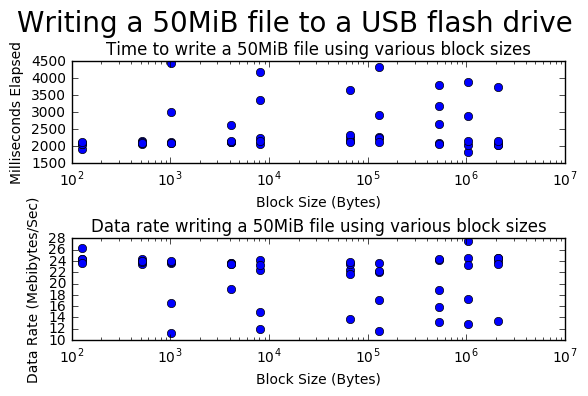

In [5]:
%matplotlib inline

with open('./results_usb.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.suptitle(
        'Writing a 50MiB file to a USB flash drive',
        fontsize=20,
    )
    
    plt.subplot(2, 1, 1)
    plt.title(
        'Time to write a 50MiB file ' +
        'using various block sizes'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Milliseconds Elapsed')
    plt.xscale('log')
    plt.tight_layout()
    plt.plot(x, y, 'bo')
    
    plt.subplot(2, 1, 2)
    plt.title(
        'Data rate writing a 50MiB file ' +
        'using various block sizes'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.tight_layout()
    plt.plot(x, rates, 'bo')
    
    plt.subplots_adjust(top=0.85)
    plt.show()

### Distributed file system
`./experiment_create_random_file.py` was run on a the CS Teaching Labs using a distributed file system (DFS) with results collected in a file `results_dfs.csv`, summarized below:

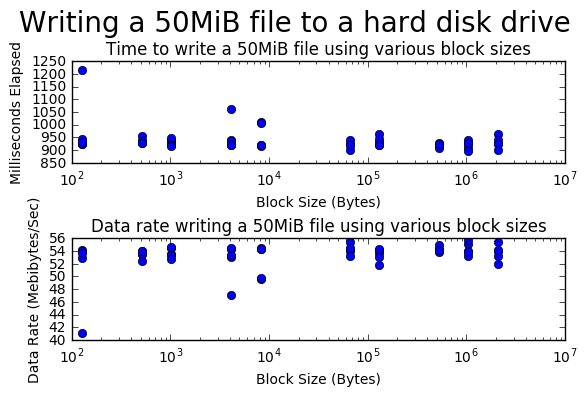

In [4]:
%matplotlib inline

with open('./results_dfs.csv') as csvfile:
    x, y, rates = get_data(csvfile)
    
    plt.suptitle(
        'Writing a 50MiB file to a hard disk drive',
        fontsize=20,
    )
    
    plt.subplot(2, 1, 1)
    plt.title(
        'Time to write a 50MiB file ' +
        'using various block sizes'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Milliseconds Elapsed')
    plt.xscale('log')
    plt.tight_layout()
    plt.plot(x, y, 'bo')
    
    plt.subplot(2, 1, 2)
    plt.title(
        'Data rate writing a 50MiB file ' +
        'using various block sizes'
    )
    plt.xlabel('Block Size (Bytes)')
    plt.ylabel('Data Rate (Mebibytes/Sec)')
    plt.xscale('log')
    plt.tight_layout()
    plt.plot(x, rates, 'bo')
    
    plt.subplots_adjust(top=0.85)
    plt.show()